# 📌 Iris Dataset Analysis - Machine Learning Lab
### Author: Kersha Broussard
### Date: March 2025
### Repository: GitHub - applied-ml-kersha
### Dataset: Iris (Seaborn Library)

### 1. Load & Inspect the Data

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder

# Load Iris Dataset
iris = sns.load_dataset('iris')


In [3]:
# Display Basic Dataset Info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Display First 10 Rows
print(iris.head(10))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


In [5]:
# Check for Missing Values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# Display Summary Statistics
print(iris.describe())


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
# Check Numeric Feature Correlations
print(iris.corr(numeric_only=True))

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


#### Reflection 1:
1. How many data instances and features exist?

2. What are the feature names?

3. Are there missing values?

4. Which features are numeric vs categorical?

5. Are there any correlations?

### ️2. Data Exploration & Preparation

#### 2.1 Explore Data Patterns & Distributions

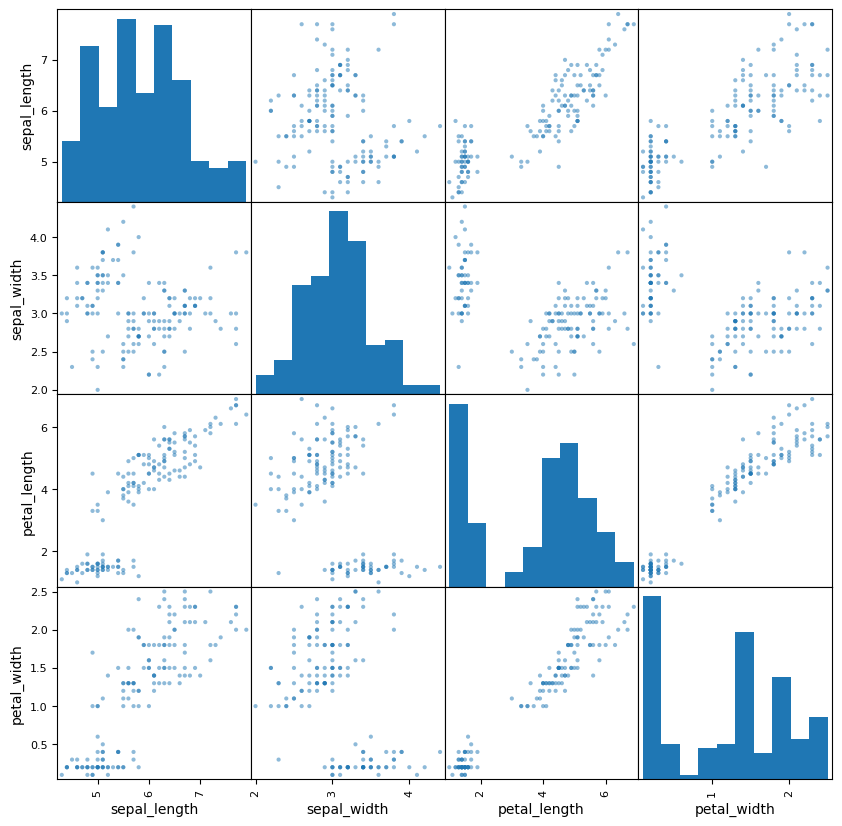

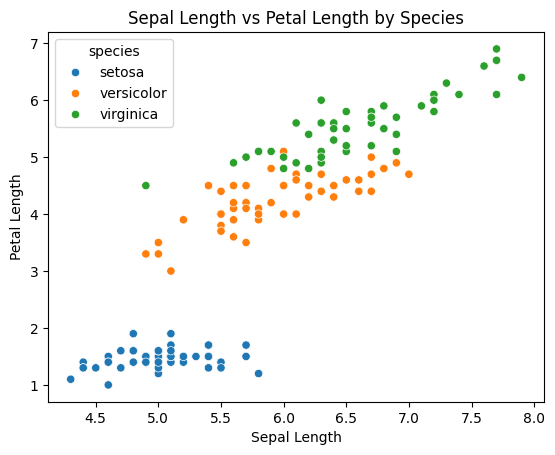

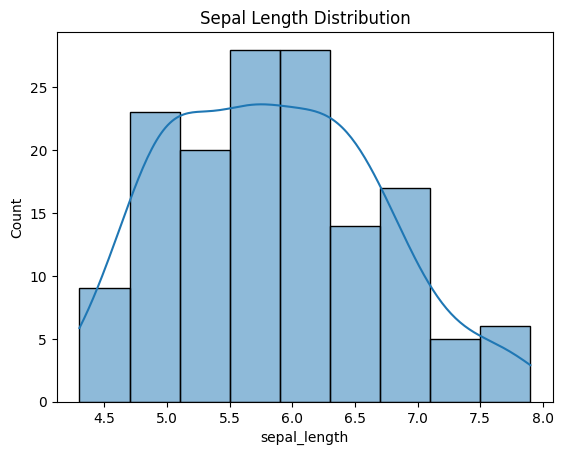

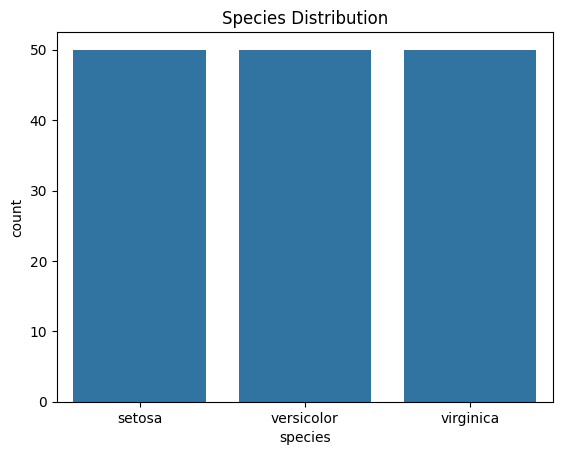

In [9]:
# Scatter Matrix of Numeric Attributes
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scatter_matrix(iris[attributes], figsize=(10, 10))
plt.show()

# Scatter Plot: Sepal Length vs Petal Length by Species
sns.scatterplot(x=iris['sepal_length'], y=iris['petal_length'], hue=iris['species'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length by Species')
plt.show()

# Histogram of Sepal Length
sns.histplot(iris['sepal_length'], kde=True)
plt.title('Sepal Length Distribution')
plt.show()

# Count Plot: Species Distribution
sns.countplot(x='species', data=iris)
plt.title('Species Distribution')
plt.show()


#### Reflection 2.1:
1. What patterns or anomalies do you notice?

2. Do any features stand out as predictors?

3. Are there any class imbalances?

### 2.2 Handle Missing Values & Clean Data

In [10]:
# Check for Missing Values
iris.isnull().sum()
# No missing values in this dataset!


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 2.3 Feature Engineering

In [11]:
# Convert Categorical to Numeric (Species Encoding)
encoder = LabelEncoder()
iris['species'] = encoder.fit_transform(iris['species'])


### Reflection 2.3:
1. Why might categorical encoding be useful?

2. Why do we convert categorical data to numeric?

### ️3. Feature Selection & Justification

In [12]:
# Define Features & Target
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']


### Reflection 3:
1. Why are these features selected?

2. Which features might be highly predictive?

### ️4. Train-Test Splitting & Comparison

#### Basic Train/Test Split

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Iris dataset
iris = load_iris(as_frame=True)  # Load as a Pandas DataFrame
df = iris.frame

# Define Features (X) and Target (y)
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Perform Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Display the results
print(f'Train set size: {X_train.shape}, Test set size: {X_test.shape}')



Train set size: (120, 4), Test set size: (30, 4)


#### Stratified Train/Test Split

In [14]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))


Train size: 120
Test size: 30


#### Compare Results

In [15]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['sepal_length'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['sepal_length'].value_counts(normalize=True))


Original Class Distribution:
 species
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64
Train Set Class Distribution:
 sepal_length
5.0    0.075000
5.7    0.066667
5.1    0.058333
6.4    0.058333
5.4    0.050000
6.3    0.050000
5.6    0.050000
5.8    0.050000
4.9    0.041667
5.5    0.041667
6.0    0.041667
6.1    0.033333
4.8    0.033333
6.7    0.033333
6.9    0.033333
6.2    0.025000
4.6    0.025000
7.2    0.025000
5.9    0.025000
6.5    0.025000
5.2    0.025000
7.7    0.016667
6.8    0.016667
6.6    0.016667
7.0    0.008333
7.4    0.008333
7.1    0.008333
4.7    0.008333
4.4    0.008333
7.3    0.008333
5.3    0.008333
7.9    0.008333
4.3    0.008333
4.5    0.008333
Name: proportion, dtype: float64
Test Set Class Distribution:
 sepal_length
6.7    0.133333
6.3    0.100000
5.5    0.066667
5.1    0.066667
6.5    0.066667
7.7    0.066667
4.4    0.066667
6.1    0.066667
4.8    0.033333
6.0    0.033333
4.7    0.033333
4.9    0.033333
5.8    0.033333
6.8    0.033333

### Reflection 4:
1. Why might stratification improve model performance?

2. How close are training & test distributions to the original dataset?

3. Which split method produced better class balance?